<a href="https://colab.research.google.com/github/blakejessis/PZMS/blob/main/stats_PR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install --upgrade scipy
import scipy
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_1 = pd.read_csv('/content/1.txt', header=None)
data_2 = pd.read_csv('/content/2.txt', header=None)
data_3 = pd.read_csv('/content/3.txt', header=None)

data = [data_1, data_2, data_3]

In [ ]:
for datas in data:
  print(datas.shape)

(100, 2)
(200, 4)
(100, 2)


In [ ]:
def t_criteria(data):
  if data.shape[0] == 100:
    return 1.9842169515086827
  else:
    return 1.971956544249395

In [ ]:
def importance(t_red, t_crit):
  if t_red > t_crit:
    return 'значим'
  else:
    return 'не значим'

In [ ]:
def fisher_criteria(r2):
  return r2 / (1 - r2) * (len(data_1) - 2)

1. Доверительный интервал для параметров регрессии

In [ ]:
import scipy.stats as sps

n = len(data_1[0])
lin_model = sps.linregress(data_1[0], data_1[1])
a,b = lin_model.slope, lin_model.intercept
# оценка ср.кв. ошибки для a и b
a_err, b_err = lin_model.stderr, lin_model.intercept_stderr
# Доверительный интервал для alpha=5%
a_conf = sps.t.interval(0.95, df = n-2, loc=a, scale=a_err)
b_conf = sps.t.interval(0.95, df = n-2, loc=b, scale=b_err)

fisher_crit = 254.32

t_res_1 = np.abs(a / a_err) 
t_res_2 = np.abs(b / b_err)
print('Работа с файлом 1:')
print(f"a = {a:0.4f}, α=5% [{a_conf[0]:0.4f} - {a_conf[1]:0.4f}], {importance(t_res_1, t_criteria(data_1[0]))}")
print(f"b = {b:0.4f}, α=5% [{b_conf[0]:0.4f} - {b_conf[1]:0.4f}], {importance(t_res_2, t_criteria(data_1[0]))}")

print(f'Посчитанное F-значение: {fisher_criteria(lin_model.rvalue ** 2)}\nКритическое значение: {fisher_crit}\nУравнение адекватно.')

Работа с файлом 1:
a = 1.0201, α=5% [0.9819 - 1.0584], значим
b = -1.1683, α=5% [-1.7836 - -0.5530], значим
Посчитанное F-значение: 2803.7035238422864
Критическое значение: 254.32
Уравнение адекватно.


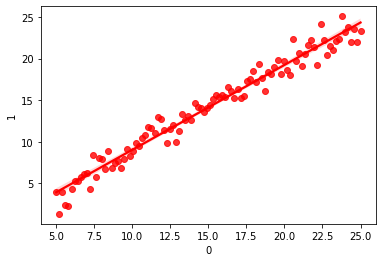

In [ ]:
import seaborn as sns
sns.regplot(data_1[0], data_1[1], color='red')

Файл 2.

In [ ]:
!pip install chowtest
from chow_test import chowtest

ImportError: ignored

In [ ]:
data_2.columns = ['col' + str(i) for i in range(len(data_2.columns))]

In [ ]:
def chow(data):
  lr = LinearRegression()
  lr.fit(data[['col0', 'col1', 'col2']], data['col3'])

  data_1 = data[data['col1'] == 1]
  data_2 = data[data['col1'] == 0]
  data_3 = data[data['col2'] == 1]
  data_4 = data[data['col2'] == 0]

  lr1 = LinearRegression()
  lr2 = LinearRegression()
  lr3 = LinearRegression()
  lr4 = LinearRegression()

  RSS = sum((lr.predict(data[['col0', 'col1', 'col2']]) - data['col3']) ** 2)

  lr1.fit(data_1[['col0', 'col1', 'col2']], data_1['col3'])
  lr2.fit(data_2[['col0', 'col1', 'col2']], data_2['col3'])
  lr3.fit(data_3[['col0', 'col1', 'col2']], data_3['col3'])
  lr4.fit(data_4[['col0', 'col1', 'col2']], data_4['col3'])

  RSS1 = sum((lr1.predict(data_1[['col0', 'col1', 'col2']]) - data_1['col3']) ** 2) 
  RSS2 = sum((lr2.predict(data_2[['col0', 'col1', 'col2']]) - data_2['col3']) ** 2)
  RSS3 = sum((lr1.predict(data_1[['col0', 'col1', 'col2']]) - data_1['col3']) ** 2) 
  RSS4 = sum((lr2.predict(data_2[['col0', 'col1', 'col2']]) - data_2['col3']) ** 2)

  F_val = ((RSS - RSS1 - RSS2) / 2) / ((RSS1 + RSS2) / (len(data['col1']) - 2 * 2))
  F_val2 = ((RSS - RSS3 - RSS4) / 2) / ((RSS3 + RSS4) / (len(data['col1']) - 2 * 2))
  sns.regplot(data_1['col0'], data_1['col3'])
  sns.regplot(data_2['col0'], data_2['col3'])
  plt.figure()
  sns.regplot(data_3['col0'], data_3['col3'])
  sns.regplot(data_4['col0'], data_4['col3'])

  return F_val

In [ ]:
lr = LinearRegression()
lr.fit(data_2[['col0', 'col1', 'col2']], data_2['col3'])

sum((lr.predict(data_2[['col0', 'col1', 'col2']]) - data_2['col3']) ** 2)

10732.707982604377

2848.382120876363

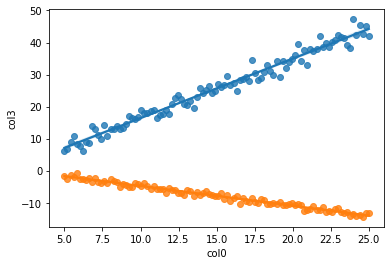

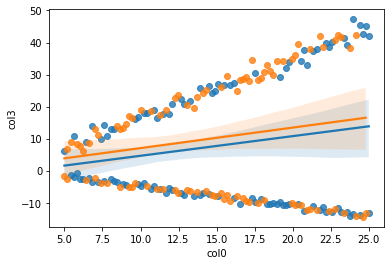

In [ ]:
chow(data_2)

Разбиение по переменной 2
Полученное F-значение: 2848.382120876363
Критическое значение: 5.63
Структурных сдвигов нет.


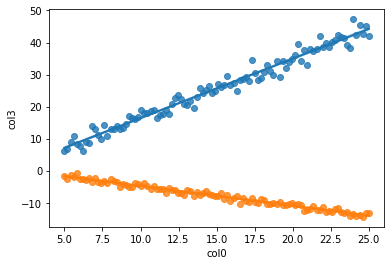

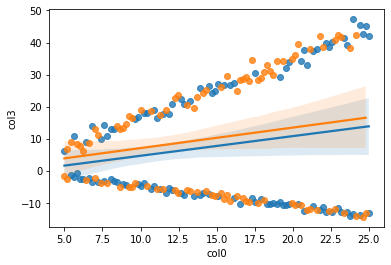

In [ ]:
print(f'Разбиение по переменной 2\nПолученное F-значение: {chow(data_2)}\nКритическое значение: 5.63\nСтруктурных сдвигов нет.')

3. Гетероскедастичность

In [ ]:
from scipy.stats import spearmanr

In [ ]:
rxy = spearmanr(data_3[0], data_3[1])[0]

In [ ]:
rxy

0.5229762976297629

In [ ]:
T_get = np.abs(rxy) * (np.sqrt(len(data_3[0]) - 2)) / np.sqrt(1 - rxy ** 2)

In [ ]:
t_crit = 1.9799

In [ ]:
T_get, t_crit

(6.074051815926558, 1.9799)

In [ ]:
print(f'Работа с файлом 3, Спирмен:\nПолученное Т-значение: {T_get}\nКритическое: {t_crit}\nГипотезу об отсутствии гетероскедастичности отвергаем.')

Работа с файлом 3, Спирмен:
Полученное Т-значение: 6.074051815926558
Критическое: 1.9799
Гипотезу об отсутствии гетероскедастичности отвергаем.


In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [ ]:
F_get = het_goldfeldquandt(data_3[1], np.array(data_3[0]).reshape(-1, 1), split=0.5)[0]

In [ ]:
F_crit = 1.56

In [ ]:
print(f'Работа с файлом 3, Гольфелд-Квандт:\nПолученное F-значение: {F_get}\nКритическое: {F_crit}\nГипотезу об отсутствии гетероскедастичности отвергаем.')

Работа с файлом 3, Гольфелд-Квандт:
Полученное F-значение: 3.0850849694115223
Критическое: 1.56
Гипотезу об отсутствии гетероскедастичности отвергаем.


In [ ]:
import scipy.stats as sps

n = len(data_3[0])
lin_model = sps.linregress(data_3[0], data_3[1])
a,b = lin_model.slope, lin_model.intercept
# оценка ср.кв. ошибки для a и b
a_err, b_err = lin_model.stderr, lin_model.intercept_stderr
# Доверительный интервал для alpha=5%
a_conf = sps.t.interval(0.95, df = n-2, loc=a, scale=a_err)
b_conf = sps.t.interval(0.95, df = n-2, loc=b, scale=b_err)

fisher_crit = 254.32

t_res_1 = np.abs(a / a_err) 
t_res_2 = np.abs(b / b_err)
print('Работа с файлом 1:')
print(f"a = {a:0.4f}, α=5% [{a_conf[0]:0.4f} - {a_conf[1]:0.4f}], {importance(t_res_1, t_criteria(data_1[0]))}")
print(f"b = {b:0.4f}, α=5% [{b_conf[0]:0.4f} - {b_conf[1]:0.4f}], {importance(t_res_2, t_criteria(data_1[0]))}")

print(f'Посчитанное F-значение: {fisher_criteria(lin_model.rvalue ** 2)}\nКритическое значение: {fisher_crit}\nУравнение неадекватно.')

Работа с файлом 1:
a = 1.7906, α=5% [1.2277 - 2.3535], значим
b = -3.6547, α=5% [-12.7139 - 5.4044], не значим
Посчитанное F-значение: 39.84963058248374
Критическое значение: 254.32
Уравнение неадекватно.


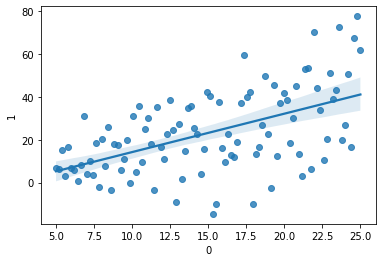

In [ ]:
sns.regplot(data_3[0], data_3[1])